In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/data.csv')
data.sample(5)

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
93,0e578340-b341-46c1-ac84-22724a02394a,31000.0,5000.0,"NO.107 BLOCK F, PANGSAPURI PKNS",JALAN SS6/1 KELANA JAYA,NaN,SELANGOR,PETALING JAYA,47301.0,APPROVED,3893.0,24,18,10000,GROUP SOUS CHEF,EXPAND BUSINESS
436,47a3fffb-9920-453f-9422-0120e0636f30,63000.0,10000.0,JC 7672 JALAN BJB SEKSYEN 5/16,BANDAR JASIN BESTARI SEKSYEN 5,BEMBAN,MELAKA,BEMBAN,77200.0,REJECTED,5150.0,24,18,10000,SENIOR SURVEY ENGINEER,OTHER USAGE
821,8589af85-fc64-4f30-b795-16d430bff523,3000.0,2000.0,"NO.12,LORONG PG/2",TAMAN PALMA 1A,NaN,PERAK,KAMUNTING,34600.0,APPROVED,3010.0,24,18,5000,POLICE,RENOVATION
206,1fda6d31-578f-4bc7-9370-d2bd3a908279,3000.0,1000.0,NO 44 JLN 9/9 F BANDAR BARU BANGI,NaN,NaN,SELANGOR,BANDAR BARU BANGI,43650.0,REJECTED,1200.0,24,18,1000,FREELANCE,EDUCATION
928,972a83e3-b352-4b20-b58b-0559d6ada955,17000.0,10000.0,NO53 JALAN PAHLAWAN 5,TAMAN PAHLAWAN,TELOK PANGLIMA GARANG,SELANGOR,TELOK PANGLIMA GARANG,42500.0,REJECTED,1819.0,24,18,10000,TERMINAL TRACTOR OPERATOR,EXPAND BUSINESS


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

In [4]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


In [5]:
data.nunique()

id                   1000
ela                    76
financeAmount          46
address1              961
address2              806
address3              359
state                  17
city                  214
postcode              349
applicationStatus       2
netSalary             550
loanTenure              4
interestRate            2
loanApplied            55
jobTitle              590
loanReason              6
dtype: int64

In [6]:
data['applicationStatus'].value_counts(normalize=True)

applicationStatus
REJECTED    0.788
APPROVED    0.212
Name: proportion, dtype: float64

* The dataset has data on 1000 customers.
* There are 16 variables including 15 independent variables and 1 dependent variable which is applicationStatus.
* There are 7 numeric variables.
* There are 9 categorical variables.
* There are missing values in the dataset.
* There are no duplicated rows in the dataset.
* id is uniformly distributed. Therefore, id acts as an identifier and lacks valuable information for the model.
* address1, address2, address3, city, postcode and jobTitle contain a large number of categories. Therefore, it seems it lacks much informaton for the models.
* The ratio of REJECTED to APPROVED is 0.788:0.212, so this is imbalanced dataset. Major class: REJECTED, Minor Class: APPROVED


In [7]:
data = data.set_index(['id'])
data['applicationStatus'] = data['applicationStatus'].map({'APPROVED': 1, 'REJECTED': 0})

In [8]:
approved_df = data[data['applicationStatus'] == 1]
approved_df.sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
8589af85-fc64-4f30-b795-16d430bff523,3000.0,2000.0,"NO.12,LORONG PG/2",TAMAN PALMA 1A,NaN,PERAK,KAMUNTING,34600.0,1,3010.00,24,18,5000,POLICE,RENOVATION
06cfcf62-d2ce-4a29-ad14-5f87968b9b88,18000.0,2000.0,T/L 4-7 LORONG HJ MOHD NASIR,KAMPUNG PARIT LAPIS,MUKIM V,JOHOR,BATU PAHAT,83000.0,1,3351.44,24,18,2000,EXECUTIVE,OTHER USAGE
4d29d534-1ab5-4062-bdb4-0190dbf189d4,12000.0,3000.0,NO 112 KAMPUNG RAJA,NaN,NaN,PERAK,PARIT,32800.0,1,3200.00,24,18,5000,ELECTRICIAN,RENOVATION
61f2290d-872a-4f6a-ac86-fa809c375fcc,30000.0,3000.0,LOT 49A-3 JALAN BERKAT 1,KAMPUNG SRI AMAN,NaN,SELANGOR,PUCHONG,47100.0,1,3682.00,24,18,10000,KERANI,OTHER USAGE
8a2093fe-3f72-4aec-a504-7e789cb8bb87,49000.0,10000.0,698 LORONG PUTERI 2/B,TAMAN PUTERI,NaN,KEDAH,PADANG SERAI,9400.0,1,7624.00,18,18,10000,SALES MANAGER,RENOVATION


In [9]:
rejected_df = data[data['applicationStatus'] == 0]
rejected_df.sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
977a8eac-a5c4-47fd-a670-a4e75d332f7b,NaN,NaN,NO 31 JALAN KEDIDI 22,TAMAN SCIENTEX PASIR GUDANG,JOHOR,JOHOR,PASIR GUDANG,81700.0,0,359313.0,24,18,10000,CONTRUCTION,EXPAND BUSINESS
368f9667-42f3-4dd8-8ea3-023e39164da7,5000.0,5000.0,NO 25,LOT 2095,BATU 9 JALAN GOMBAK,KUALA LUMPUR,KUALA LUMPUR,53100.0,0,1700.0,24,18,10000,ADMIN,OTHER USAGE
030989c5-1bc2-4e99-b0f2-62199397ae13,11000.0,2500.0,LOT 303 1F,LORONG 5,KG SUNGAI SERAI,SELANGOR,HULU LANGAT,43100.0,0,1560.0,24,18,2500,FRONTDESK,DEBTS CONSOLIDATION
0a6dacf6-3b0a-4fb9-ad8a-a05e9312bd7b,0.0,0.0,NO 158,JLN MANTAU 3/2,TMN MANTAU INDAH 3,NEGERI SEMBILAN,SEREMBAN,70300.0,0,1570.0,24,18,2500,PEMANDU KENDERAAN,EDUCATION
0dd79517-0abd-4170-a90d-62a9615d24e5,15000.0,10000.0,KAMPUNG KARAMUNTING,JALAN BATU SAPI,PETI SURAT 2605,SABAH,SANDAKAN,90729.0,0,2500.0,24,18,10000,POLIS BANTUAN,EXPAND BUSINESS


In [10]:
data[data['ela'].isna()].sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
a103b295-cf07-4a31-a8dc-12950e8ac0e8,NaN,NaN,A11-1-06,JALAN PRISMA 1,RUMAH ISKANDAR MALAYSIA,JOHOR,ISKANDAR PUTERI,79200.0,0,1787.0,24,18,1500,ON BOARD CLERK,OTHER USAGE
2b65d037-2663-4984-af4b-cd249273ecc8,NaN,NaN,NO 17 JALAN DBI 17,TAMAN DESA BUKIT INDAH,SG BULOH,SELANGOR,SUNGAI BULOH,47000.0,0,3500.0,24,18,6000,BUSINESS OWNER,EXPAND BUSINESS
12351146-bd8b-40e2-9545-7a5dc0ed8d47,NaN,NaN,21,JALAN BK3/5,BANDAR KINRARA,SELANGOR,PUCHONG,47180.0,0,3300.0,24,18,10000,PRODUCTION EXECUTIVE,DEBTS CONSOLIDATION
977a8eac-a5c4-47fd-a670-a4e75d332f7b,NaN,NaN,NO 31 JALAN KEDIDI 22,TAMAN SCIENTEX PASIR GUDANG,JOHOR,JOHOR,PASIR GUDANG,81700.0,0,359313.0,24,18,10000,CONTRUCTION,EXPAND BUSINESS
9c853373-ba24-4979-b133-37ac73bd8764,NaN,NaN,"NO 57 TAMAN TERATAI, JALAN LANGGAR, 05460 ALOR...",NaN,NaN,KEDAH,ALOR SETAR,5460.0,0,3900.0,24,18,10000,SALES,OTHER USAGE


In [11]:
data[data['financeAmount'].isna()].sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
94ec92ae-13d0-485f-9552-9c3bef681d19,NaN,NaN,C4/05,JALAN CEKUR,TAMAN UITM,PAHANG,BANDAR PUSAT JENGKA,26400.0,0,1043.08,24,18,1500,PEMBANTU AWAM,MEDICAL EXPENSES
a103b295-cf07-4a31-a8dc-12950e8ac0e8,NaN,NaN,A11-1-06,JALAN PRISMA 1,RUMAH ISKANDAR MALAYSIA,JOHOR,ISKANDAR PUTERI,79200.0,0,1787.00,24,18,1500,ON BOARD CLERK,OTHER USAGE
12bd4297-c3eb-4dd9-807f-2bd2630c3a07,NaN,NaN,NO 15,JLN PUTRA 3/1,BANDAR PUTRA,JOHOR,SEGAMAT,85000.0,0,1666.17,24,18,10000,GURU,EXPAND BUSINESS
9c853373-ba24-4979-b133-37ac73bd8764,NaN,NaN,"NO 57 TAMAN TERATAI, JALAN LANGGAR, 05460 ALOR...",NaN,NaN,KEDAH,ALOR SETAR,5460.0,0,3900.00,24,18,10000,SALES,OTHER USAGE
03f3bceb-0d7d-4893-b01a-3bfa9c0de8dd,NaN,NaN,F-9-24,MENTARI COURT,"PETALING JAYA, SELANGOR",SELANGOR,PETALING JAYA,46150.0,0,3500.00,6,18,1100,BUILDING EXECUTIVE,DEBTS CONSOLIDATION


In [12]:
print(data[data['ela'].isna()]['applicationStatus'].unique())
print(data[data['financeAmount'].isna()]['applicationStatus'].unique())

[0]
[0]


From the observation above, the NULL value in ela and financeAmount can be replaced with 0 instead of removing the row.

In [13]:
na_cols = ['ela', 'financeAmount']
for col in na_cols:
    data[col] = data[col].fillna(0)

In [14]:
data.drop(['postcode'], axis=1).describe()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14986.00000,3317.200000,0.212000,3457.413940,21.990000,17.997000,5581.600000
std,23594.16217,3355.497508,0.408929,11434.249677,4.614021,0.094868,3255.973403
min,0.00000,0.000000,0.000000,450.000000,6.000000,15.000000,1000.000000
25%,0.00000,0.000000,0.000000,1990.442500,24.000000,18.000000,3000.000000
50%,9000.00000,2000.000000,0.000000,2676.085000,24.000000,18.000000,5000.000000
75%,21000.00000,5000.000000,0.000000,3700.000000,24.000000,18.000000,10000.000000
max,397000.00000,10000.000000,1.000000,359313.000000,24.000000,18.000000,10000.000000


- There is no missing value in dataset after impute 0 for NULL.
- There is no negative value in dataset.

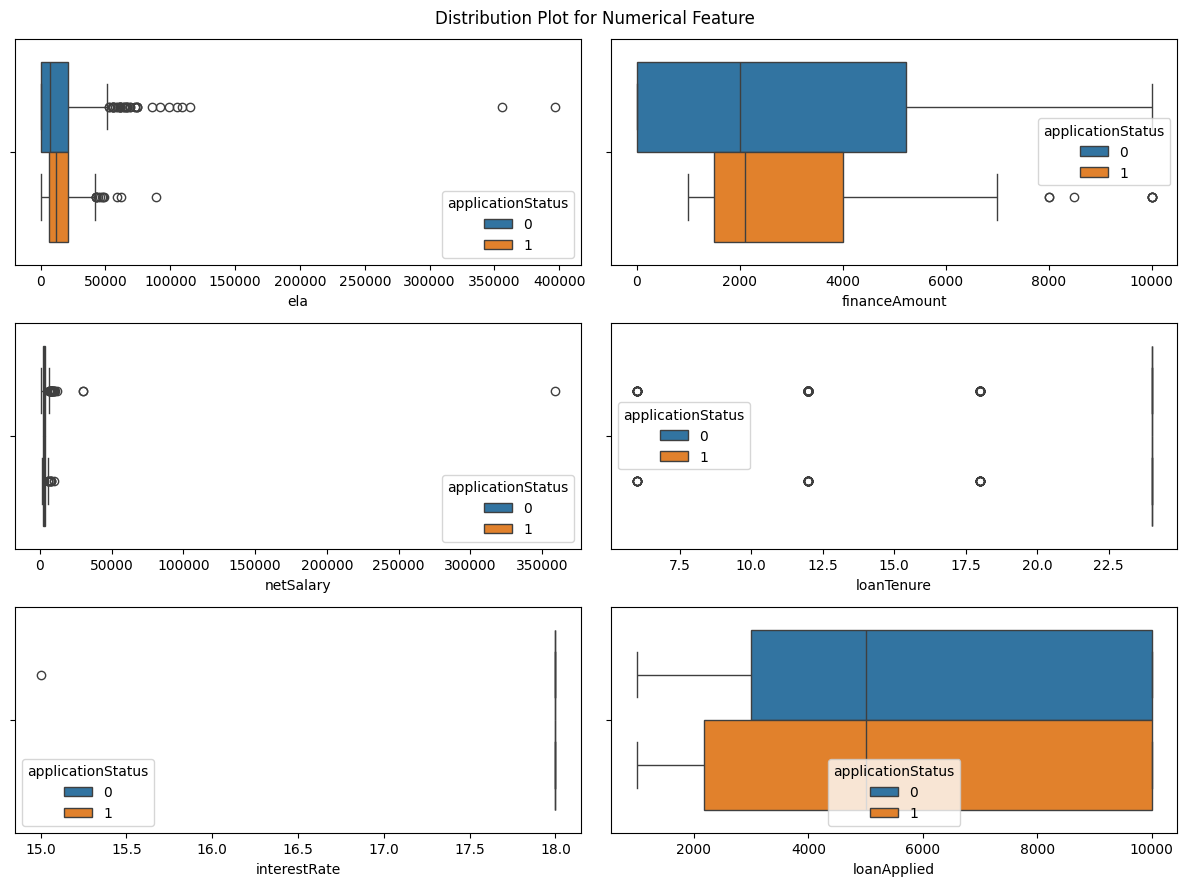

In [15]:
features = data.drop(['postcode', 'applicationStatus'], axis=1).select_dtypes(include=np.number).columns.tolist()
num_of_features = len(features)
ncols = 2
nrows = int(np.ceil(num_of_features / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows))
fig.suptitle('Distribution Plot for Numerical Feature')
axs = axs.flatten()
for i, col in enumerate(features):
    sns.boxplot(data, x=col, hue='applicationStatus', ax=axs[i])

plt.tight_layout()
plt.show()

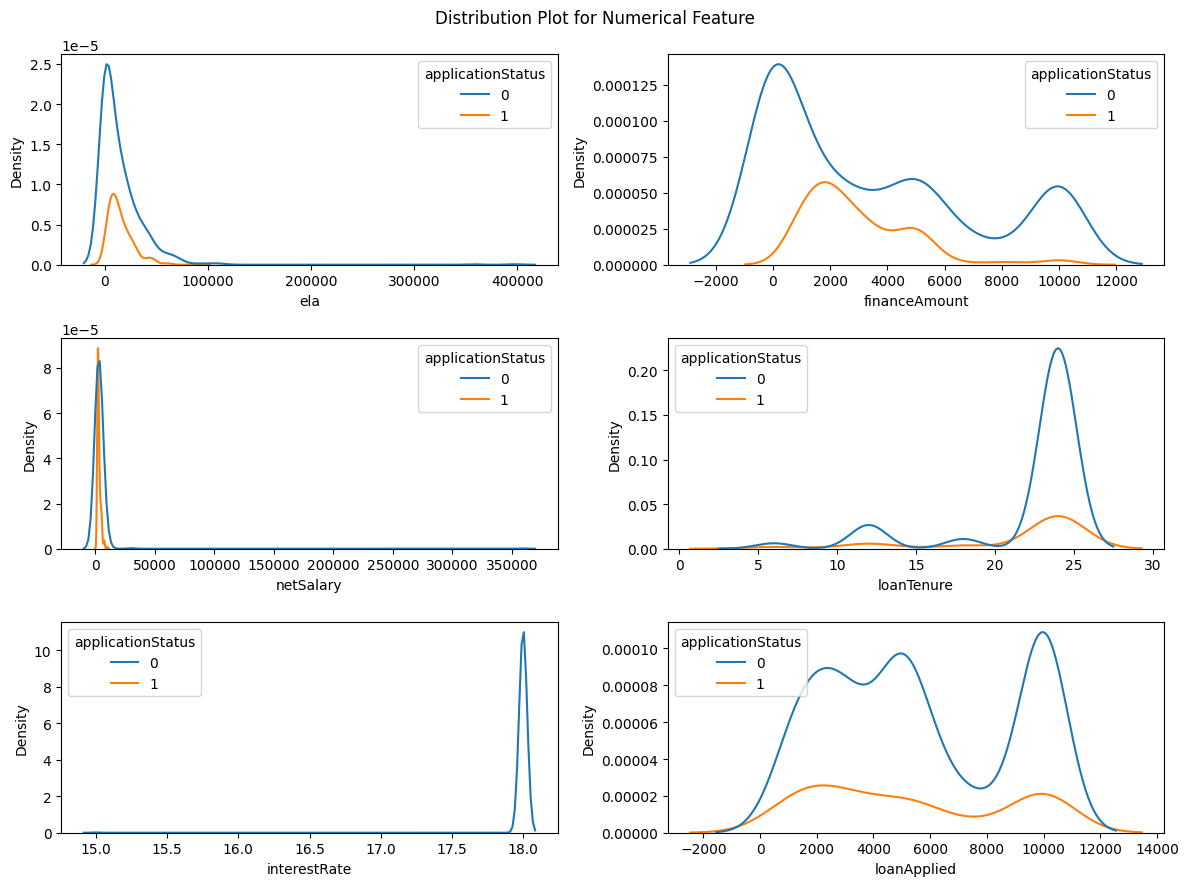

In [16]:
features = data.drop(['postcode', 'applicationStatus'], axis=1).select_dtypes(include=np.number).columns.tolist()
num_of_features = len(features)
ncols = 2
nrows = int(np.ceil(num_of_features / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows))
fig.suptitle('Distribution Plot for Numerical Feature')
axs = axs.flatten()
for i, col in enumerate(features):
    sns.kdeplot(data, x=col, hue='applicationStatus', ax=axs[i], warn_singular=False)

plt.tight_layout()
plt.show()

- Analyzing the graphs here, it turns out that the values of the variable 'loanApplied' is relatively normally distributed (but a bit skewed to the right) with 3 peaks for REJECTED and 2 peaks for APPROVED. 
- 'ela', 'financeAmount' and 'netSalary' are skewed to th right.
- 'loanTenure' and 'interestRate' are skewed to the left.

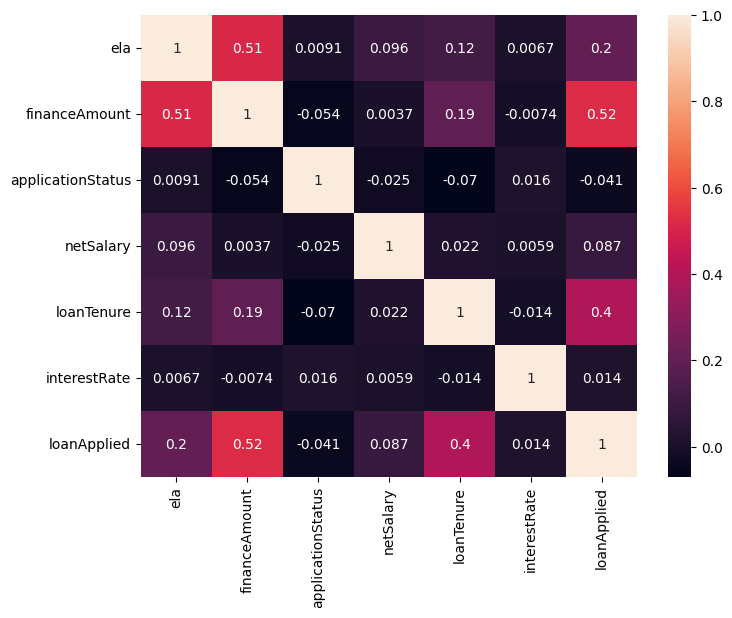

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=data.drop(['postcode'], axis=1).corr(numeric_only=True), annot=True)
plt.show()

'applicationStatus' has weak correlation to all numerical features. Therefore, there is no linear relationship between independent and dependent variables.

# Modeling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [19]:
drop_cols = ['address1', 'address2', 'address3', 'city', 'postcode', 'jobTitle']
X = data.drop(drop_cols + ['applicationStatus'], axis=1)
y = data['applicationStatus']

One-hot encoding for categorical features

In [20]:
X = pd.get_dummies(X, columns=['state', 'loanReason'], dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Scaling for numerical features

In [21]:
scaled_cols = [col for col in X_train if not col.startswith('state') and not col.startswith('loanReason')]

scaler = StandardScaler()
X_train[scaled_cols] = scaler.fit_transform(X_train[scaled_cols])
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       160
           1       0.59      0.72      0.65        40

    accuracy                           0.84       200
   macro avg       0.76      0.80      0.78       200
weighted avg       0.86      0.84      0.85       200



In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       160
           1       0.71      0.42      0.53        40

    accuracy                           0.85       200
   macro avg       0.79      0.69      0.72       200
weighted avg       0.84      0.85      0.83       200



In [25]:
gbc = GaussianNB()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.25
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       160
           1       0.21      1.00      0.35        40

    accuracy                           0.25       200
   macro avg       0.61      0.53      0.23       200
weighted avg       0.84      0.25      0.16       200



In [26]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)

y_pred = knnc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       160
           1       0.54      0.38      0.44        40

    accuracy                           0.81       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.79      0.81      0.80       200



In [27]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       160
           1       0.89      0.20      0.33        40

    accuracy                           0.83       200
   macro avg       0.86      0.60      0.62       200
weighted avg       0.84      0.83      0.79       200



In [28]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       160
           1       0.71      0.62      0.67        40

    accuracy                           0.88       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.87      0.88      0.87       200



In [29]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Learning rate set to 0.009366
0:	learn: 0.6843798	total: 56.6ms	remaining: 56.6s
1:	learn: 0.6778040	total: 57.5ms	remaining: 28.7s
2:	learn: 0.6688742	total: 58ms	remaining: 19.3s
3:	learn: 0.6623871	total: 58.6ms	remaining: 14.6s
4:	learn: 0.6592739	total: 59ms	remaining: 11.7s
5:	learn: 0.6505240	total: 59.5ms	remaining: 9.86s
6:	learn: 0.6414227	total: 60.1ms	remaining: 8.53s
7:	learn: 0.6331701	total: 60.7ms	remaining: 7.53s
8:	learn: 0.6256742	total: 61.2ms	remaining: 6.74s
9:	learn: 0.6193636	total: 61.7ms	remaining: 6.11s
10:	learn: 0.6138214	total: 62.2ms	remaining: 5.6s
11:	learn: 0.6065651	total: 62.8ms	remaining: 5.17s
12:	learn: 0.6011171	total: 63.6ms	remaining: 4.83s
13:	learn: 0.5946083	total: 64.1ms	remaining: 4.51s
14:	learn: 0.5867993	total: 64.6ms	remaining: 4.24s
15:	learn: 0.5803981	total: 65ms	remaining: 4s
16:	learn: 0.5777974	total: 65.5ms	remaining: 3.79s
17:	learn: 0.5753849	total: 66.2ms	remaining: 3.61s
18:	learn: 0.5685340	total: 66.7ms	remaining: 3.44s
19

Accuracy may not be an important metric for these experiments, it can be misleading when dealing with imbalanced datasets because it tends to be biased towards the majority class.
- Logistic Regression: It has very low precision, recall, and F1-score for class 1, indicating poor performance in identifying instances of the minority class.
- Decision Tree: While Decision Tree shows better performance for class 1 compared to Logistic Regression, its precision and recall for class 1 are still not very high.
- Random Forest: Random Forest performs relatively well in terms of recall for class 1, but its precision is lower, indicating potential misclassification of majority class instances as class 1.
- XGBoost: XGBoost shows decent performance for class 1 with higher precision, recall, and F1-score compared to the previous models.
- CatBoost: CatBoost continues to show the highest precision, recall, and F1-score for class 1 among all models, indicating better performance in identifying instances of the minority class.

Considering the imbalanced nature of the dataset, CatBoost still appears to be the best-performing model, as it achieves the highest scores for precision, recall, and F1-score for the minority class, indicating its effectiveness in dealing with imbalanced datasets. Therefore, CatBoost is the best choice for this classification.

In [30]:
feature_importance = cbc.feature_importances_
feature_names = X.columns

for importance, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print(f"{name}: {importance:.2f}")

financeAmount: 32.89
ela: 26.30
loanApplied: 15.20
netSalary: 10.12
loanTenure: 3.47
loanReason_RENOVATION: 1.53
state_MELAKA: 1.27
loanReason_DEBTS CONSOLIDATION: 1.08
loanReason_EDUCATION: 1.00
loanReason_OTHER USAGE: 0.91
state_JOHOR: 0.82
state_KUALA LUMPUR: 0.81
state_NEGERI SEMBILAN: 0.79
loanReason_EXPAND BUSINESS: 0.76
state_SELANGOR: 0.70
state_PERAK: 0.58
loanReason_MEDICAL EXPENSES: 0.52
state_PENANG: 0.31
state_KEDAH: 0.25
state_PAHANG: 0.24
state_SARAWAK: 0.21
state_SABAH: 0.07
state_PUTRAJAYA: 0.06
state_KELANTAN: 0.06
state_LBN: 0.02
state_TERENGGANU: 0.02
state_PERLIS: 0.02
state_KUANTAN: 0.00
interestRate: 0.00


Features like "financeAmount" and "ela" have high importance scores, suggesting they strongly influence the model's decisions, while features like "interestRate" have negligible importance.

# Additional

## Simple Neural Network

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=30,
    batch_size=16,
    validation_data=(X_test.values, y_test.values)
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5313 - loss: 0.6993 - val_accuracy: 0.8000 - val_loss: 0.5260
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.7703 - loss: 0.5304 - val_accuracy: 0.8000 - val_loss: 0.4900
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8084 - loss: 0.4717 - val_accuracy: 0.8000 - val_loss: 0.4838
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7977 - loss: 0.4749 - val_accuracy: 0.8000 - val_loss: 0.4778
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8048 - loss: 0.4423 - val_accuracy: 0.8000 - val_loss: 0.4682
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7740 - loss: 0.4679 - val_accuracy: 0.8000 - val_loss: 0.4584
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.7653 - loss: 0.4758 - val_accuracy: 0.8000 - val_loss: 0.4473
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.7820 - loss: 0.4294 - val_accuracy: 0.80

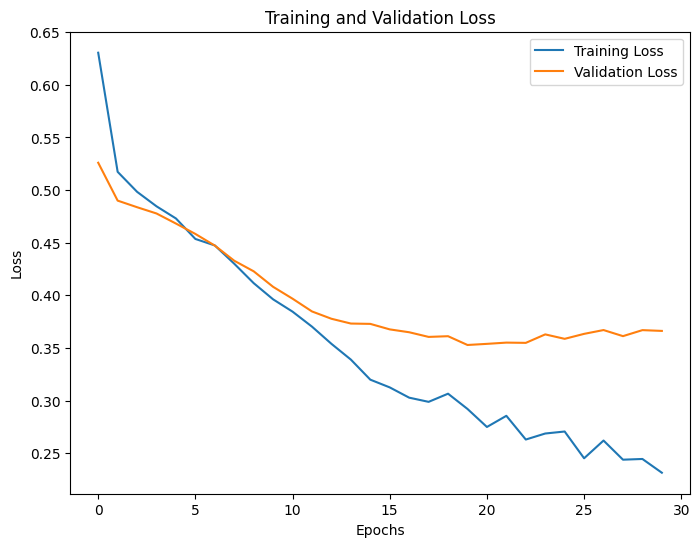

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [35]:
y_pred = model.predict(X_test.values)
y_pred = (y_pred > 0.5)

print(f'Accuracy: {accuracy_score(y_test.values, y_pred)}')
print(f'{classification_report(y_test.values, y_pred)}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       160
           1       0.75      0.45      0.56        40

    accuracy                           0.86       200
   macro avg       0.81      0.71      0.74       200
weighted avg       0.85      0.86      0.85       200



Neural networks require a larger amount of data to effectively capture the underlying patterns and relationships, making them more susceptible to overfitting on small datasets. This overfitting can manifest as decreasing training loss but increasing validation loss in 30 ephoces.